<a href="https://colab.research.google.com/github/PSY21801028/SYPark-HGU/blob/main/230328_AILecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

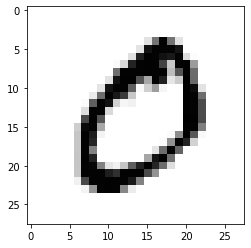

In [33]:
from PIL import Image
from numpy import asarray
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import sys
import keras
import tensorflow as tf
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train.shape
# type(x_train[0,0,0])
x_train = x_train.astype('float32') / 255.
n = 1
plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
plt.show()

In [34]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#input_shape

In [35]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

In [38]:
batch_size = 128
epochs = 12
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
hist = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 15s 9ms/step - loss: 0.1862 - accuracy: 0.9432 - val_loss: 7.0001 - val_accuracy: 0.9827
Epoch 2/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 5.7348 - val_accuracy: 0.9886
Epoch 3/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 5.1538 - val_accuracy: 0.9887
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 3.7812 - val_accuracy: 0.9908
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 4.0627 - val_accuracy: 0.9914
Epoch 6/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 3.3332 - val_accuracy: 0.9933
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 3.9769 - val_accuracy: 0.9921
Epoch

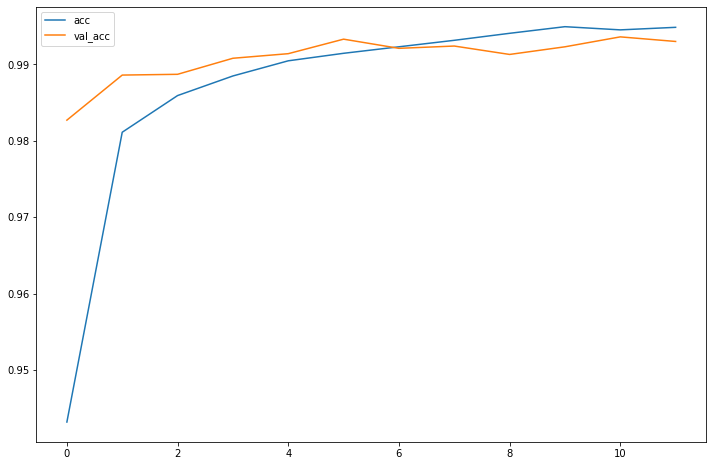

In [40]:
plt.figure(figsize=(12,8))
#plt.plot(hist.history['loss’])
#plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.legend(['loss','val_loss', 'acc','val_acc’])
plt.legend(['acc','val_acc'])
plt.show()